<h1>
<center>
Module 2: Intro to Decision Trees
</center>
</h1>
<div class=h1_cell>

<p>In this module we will build several decision trees to support predictions on the Titanic data. The column that is the target of our prediction is `Survived`. The goal is to use values in the other columns to predict the correct value for `Survived`, i.e., either a 0 (perished) or 1 (survived).
<p>The data we are using is known as *training data*. It is what is called *labeled data*. In essence, it is labeled because we know what the value of `Survived` is in the training data. This allows us to make a prediction and then compare it with reality. This reality check allows us to attempt improvement in our predictor. We can analyze what rows we are getting wrong (and right) and adjust our predictor accordingly. When we think we have a good predictor (because it works well with the training data), we step up to trying our same predictor on *test data*. Will get to that a little later.

</div>

In [11]:
import pandas as pd
#url = 'https://docs.google.com/spreadsheets/d/1z1ycUZjJpmMWB4gXbhwRQ9B_qa42CwzAQkf82mLibxI/pub?output=csv'
with open('/Users/Noah/Documents/My Documents/2018:2019/2. Winter/CIS 399/Assignment2/titanic_wrangled_week1.csv', 'r') as f:
    titanic_table = pd.read_csv(f)
titanic_table.head(2)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_age,emb_C,emb_Q,emb_S,emb_nan
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,0


In [2]:
"""with open('/content/gdrive/My Drive/class_tables/titanic_wrangled_week1.csv', 'r') as f:
  titanic_table = pd.read_csv(f)

titanic_table.head(2)  #make sure it looks ok - we see the results of our week 1 wrangling
""""

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,no_age,filled_age,emb_C,emb_Q,emb_S,emb_nan,age_bin,age_Child,age_Adult,age_Senior
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,22.0,0,0,1,0,Child,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,0,38.0,1,0,0,0,Adult,0,1,0


In [10]:
#I am setting the option to see all the columns of our table as we build it.
pd.set_option('display.max_columns', None)

In [9]:
#Just for giggles, let's print out what versions we are using for various libraries. Remeber, this is what colab is using.

pd.show_versions(as_json=False)


INSTALLED VERSIONS
------------------
commit: None
python: 3.7.1.final.0
python-bits: 64
OS: Darwin
OS-release: 18.2.0
machine: x86_64
processor: i386
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: en_US.UTF-8

pandas: 0.23.4
pytest: 4.0.2
pip: 18.1
setuptools: 40.6.3
Cython: 0.29.2
numpy: 1.15.4
scipy: 1.1.0
pyarrow: None
xarray: None
IPython: 7.2.0
sphinx: 1.8.2
patsy: 0.5.1
dateutil: 2.7.5
pytz: 2018.7
blosc: None
bottleneck: 1.2.1
tables: 3.4.4
numexpr: 2.6.8
feather: None
matplotlib: 3.0.2
openpyxl: 2.5.12
xlrd: 1.2.0
xlwt: 1.3.0
xlsxwriter: 1.1.2
lxml: 4.2.5
bs4: 4.6.3
html5lib: 1.0.1
sqlalchemy: 1.2.15
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None


I want to focus on the sex column. Let's do a bit of wrangling first. I'll one-hot encode the column.

In [12]:
one_hot_gender = pd.get_dummies(titanic_table['Sex'],prefix='sex',dummy_na=False)  #no empties so use False
titanic_table = titanic_table.join(one_hot_gender)
titanic_table.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_age,emb_C,emb_Q,emb_S,emb_nan,sex_female,sex_male
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,0,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,1,0,0,1


<hr>
<h1>
Our first tree (a stump)
</h1>
<p>
<div class=h1_cell>
I'm going to focus on the `Sex` column as our first predictor.
One reason I like decision trees is because they have a good visualization.
<p>
<img src="https://www.dropbox.com/s/2940iqadl1nswbq/stump.png?raw=1" width="300" height="300">
<p>
A tree has nodes (I am using a rectangle for nodes) and leaves (I am using an oval for leaves). It operates kind of like a pachinko machine. You drop a row on it and that row eventually makes its way to a leaf. The leaf supplies the prediction for the row. For the example above, the tree first checks the value in the sex_female column. If it is 1 (i.e., True) then it takes one branch. If it is false it takes the other branch.
<p>
The tree only has one decision/node. One-node trees are sometimes called stumps. Let's see if we can code the tree in Python.  I am going to use the most straightforward way I can think of using pure Python.

</div>

In [13]:
def titanic_predictor_1(row):
    if row['sex_female']:
        prediction = 1
    else:
        prediction = 0
    return prediction

<div class=just_text>
I am going to create a new table to record the predictions for each row. I'll do this for all the predictors I try. I'll keep a record of their predictions in a this new table.
</div>

In [14]:
titanic_results = titanic_table[['Survived']].copy()  #just copy over the Survived column for now.

In [15]:
titanic_results.head()

,Survived
0,0
1,1
2,1
3,1
4,0


Now add in the results of using predictor1 function as predictor.

In [16]:
titanic_results['pred_1'] = titanic_table.apply(lambda row: titanic_predictor_1(row), axis=1)

titanic_results.head()

,Survived,pred_1
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0


<div class=just_text>
What we have is the predicted value and the actual value. If they match, good for us.
  <p>
    I'd like to see the 4 alternative cases that go with the values of `Survived` and `pred_1` in each row: true negative (tn), true positive (tp), false negative (fn), false_positive (fp). I'll define a function that will look at the two column values in a row and produce the correct case. In the end I will create a new column that captures the cases.
</div>

In [17]:
def predictor_case(row, pred, target):
  case_dict = {(0,0): 'true_negative', (1,1): 'true_positive', (0,1): 'false_negative', (1,0): 'false_positive'}
  actual = row[target]
  prediction = row[pred]
  case = case_dict[(prediction, actual)]
  return case

<div class=just_text>
Now I can apply the function to each row and build a new column `pred_1_type`.
</div>

In [46]:
titanic_results['pred_1_type'] = titanic_results.apply(lambda row: predictor_case(row, pred='pred_1', target='Survived'), axis=1)

In [19]:
titanic_results.tail()

,Survived,pred_1,pred_1_type
886,0,0,true_negative
887,1,1,true_positive
888,0,1,false_positive
889,1,0,false_negative
890,0,0,true_negative


<hr>
<h2>
Save the 4 cases in a pandas Series object
</h2>
<p>
<div class=h1_cell>
I'll count up the 4 types and save the results in a pandas Series object. For our purposes, the Series object looks like a dictionary.
</div>

In [20]:
p1_types = titanic_results['pred_1_type'].value_counts()  # returns a series
p1_types

true_negative     468
true_positive     233
false_negative    109
false_positive     81
Name: pred_1_type, dtype: int64

<hr>
<h2>
Accuracy is one measure of our predictor
</h2>
<p>
<div class=h1_cell>
We can just add the number of predictions we got right and divide by total number of rows.
</div>

In [21]:
def accuracy(cases):
    tp = cases['true_positive']
    tn = cases['true_negative']
    fp = cases['false_positive']
    fn = cases['false_negative']
    return (tp + tn)/(tp+tn+fp+fn)

accuracy(p1_types)

0.7867564534231201

<hr>
<h2>
We can also visualize the types
</h2>
<p>
<div class=h1_cell>
I will use a pie plot. Note that there are many parameters to the `plot.pie` method. I am only using a few.
</div>

In [22]:
import matplotlib

In [23]:
%matplotlib inline

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


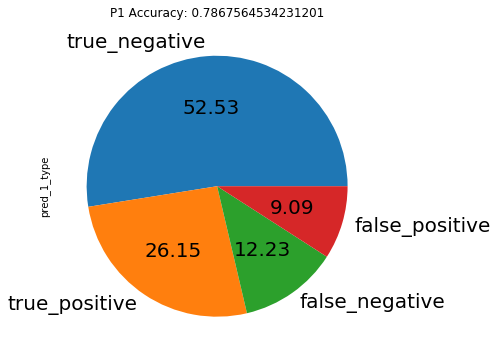

In [24]:
p1_types.plot.pie(title='P1 Accuracy: '+str(accuracy(p1_types)), autopct='%.2f', fontsize=20, figsize=(6, 6))  # need figsize to get correct aspect


<div class=just_text>
To improve our accuracy, we can look at the type of errors we are making. You can see that our errors are fairly evenly divided among fp and fn.
</div>

<hr>
<h1>
A bushier tree
</h1>
<p>
<div class=h1_cell>

I am going to try a new predictor that fills out more of the tree. I am going on a couple of pieces of information I read about the sinking: I read that "women and children first" was followed; I read that passengers in 3rd class very rarely survived. I have added new nodes and leaves to the tree to reflect this.
<p>
<img src="https://www.dropbox.com/s/0efvj0riqzs5zp1/bushy3.png?raw=1"  width="400" height="400">
<p>
One problem is that I used the cut method to divide up the age range evenly That produced `age_Child` once I used ohe. I'd like to do a little deeper exporation on setting the `ok_child` column.
</div>


<h2>
Exploring continuous columns
</h2>
<p>
<div class=h1_cell>
It is often the case that we will want to generate a discrete column from a continuous column. As we saw in module 1, we can do this by *binning* the continuous column: define bins that divide up the range of values in the column, name the bins, and then create a new column with the bin names. At the moment we are interested in the Age column, which is continuous. We have already binned this column with `cut`. I am now interested in a little deeper analysis from "women and children first" perspective. What works for me is to visualize the Age column stacked with the Survived column. This tells me both how many passengers there are for each age-bin (total height of the bar) and how many survived in each bin (the split of each bin into 2 stacked pieces). Once I can see that, I have some idea on how many bins and bin boundaries.
<p>
<b>Kludge alert:</b> you notice that I have to pull data out of the dataframe into normal Python lists to get plotting to work. I could not find a pandas equivalent of the stacked plot as I have it. But suspect it is out there :)
</div>

In [25]:
true_table = titanic_table[titanic_table.apply(lambda row: row.Survived == 1 and not pd.isnull(row.Age), axis=1)]
false_table = titanic_table[titanic_table.apply(lambda row: row.Survived == 0 and not pd.isnull(row.Age), axis=1)]

true_age_list = true_table['Age'].tolist()
false_age_list = false_table['Age'].tolist()


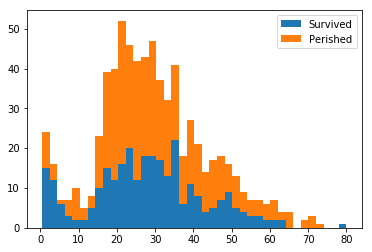

In [26]:
import matplotlib.pyplot as plt

plt.hist([true_age_list, false_age_list], 40, stacked=True, label=['Survived', 'Perished'])

plt.legend()

plt.show()

<div class=just_text>
I already have done a full-blown binning process for Age using the cut method seen in module 1. Instead of rebinning, I'll just create a new column with what I see in the plot. From the plot, I am going to choose the cutoff for `ok_child` at less than or equal to 8. I'll generate a new column to capture this using apply instead of cut.
</div>

In [27]:
titanic_table['ok_child'] = titanic_table.apply(lambda row: 1 if row.Age <= 8 else 0, axis=1)
titanic_table.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_age,emb_C,emb_Q,emb_S,emb_nan,sex_female,sex_male,ok_child
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,0,0,1,0,0,1,0


<div class=just_text>
That took care of the child question. Now I also need to one-hot encode `Pclass` for the other branch.
</div>

In [30]:
one_hot_pclass = pd.get_dummies(titanic_table['Pclass'],prefix='pclass',dummy_na=False)  #no empties in Pclass
titanic_table = titanic_table.join(one_hot_pclass)
titanic_table.head(1)

ValueError: columns overlap but no suffix specified: Index(['pclass_1', 'pclass_2', 'pclass_3'], dtype='object')

<hr>
<h1>
Ready for predictor version 2
</h1>
<p>
Here is a reminder of what we are implementing. I'll use the same simple if-then-else format.
<p>
<img src="https://www.dropbox.com/s/0efvj0riqzs5zp1/bushy3.png?raw=1"  width="400" height="400">
<p>
<div class=h1_cell>

In [31]:
def titanic_predictor_2(row):
    if row['sex_female']:
        if row['pclass_3']:
            prediction = 0
        else:
            prediction = 1
    else:
        if row['ok_child']:
            prediction = 1
        else:
            prediction = 0
    return prediction

<h2>
Now just follow steps from predictor version 1
</h2>
<p>
Build prediction column and then a types column
<div class=h1_cell>

In [32]:
titanic_results['pred_2'] = titanic_table.apply(lambda row: titanic_predictor_2(row), axis=1)

titanic_results.head()

,Survived,pred_1,pred_1_type,pred_2
0,0,0,true_negative,0
1,1,1,true_positive,1
2,1,1,true_positive,0
3,1,1,true_positive,1
4,0,0,true_negative,0


In [33]:
titanic_results['pred_2_type'] = titanic_results.apply(lambda row: predictor_case(row, pred='pred_2', target='Survived'), axis=1)
titanic_results.head()

,Survived,pred_1,pred_1_type,pred_2,pred_2_type
0,0,0,true_negative,0,true_negative
1,1,1,true_positive,1,true_positive
2,1,1,true_positive,0,false_negative
3,1,1,true_positive,1,true_positive
4,0,0,true_negative,0,true_negative


In [34]:
p2_types = titanic_results['pred_2_type'].value_counts()  # returns a series
p2_types

true_negative     529
true_positive     178
false_negative    164
false_positive     20
Name: pred_2_type, dtype: int64

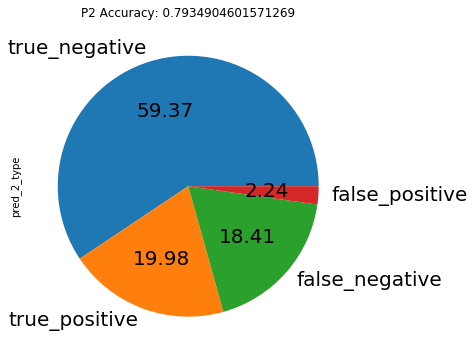

In [35]:
p2_types.plot.pie(title='P2 Accuracy: '+str(accuracy(p2_types)), autopct='%.2f', fontsize=20, figsize=(6, 6))  # need figsize to get correct aspect

<div class=just_text>
We improved our accuracy slightly. We also shrank our false positive percentage and at the same time raised our false negative percentage. This matters! Think about what it means to have a small value in false positives. Maybe we would be happy with a small number even if false neagatives became much larger.
</div>

<hr>
<h1>
A few ways to get the bigger picture
</h1>
<p>
<div class=h1_cell>
To add a little more information to our tree diagram, we actually are collecting 2 lists of rows under each leaf: the ones we got correct; the ones we got incorrect.
<p>
<img src='https://www.dropbox.com/s/vxraj0stkmpgs3p/with_types.png?raw=1' width="500" height="500">
<p>
This opens the door for more informative ways to measure a predictor other than simple accuracy. You can see 8 lists in the bushier tree, 2 lists on each of 4 leaves. We can count how many items are in each of those lists. We have already been doing that counting when comp;uting cases. But before we only interested in right versus wrong. Now we are interested in the type of right predictions and the type of wrong predictions. This leads to something called a *confusion matrix*.

<img src='https://www.dropbox.com/s/zubecbzi8zsdzgg/confusion_matrix.png?raw=1'>

We have the heart of the matrix in p1_types and p2_types. We can compute all the other measures listed from those. Let's try a few.
<div>


<h2>
Start with F1 (lower right)
</h2>
<p>
<div class=h1_cell>
This is a popular measure so let's check it out for our first predictor. But first, let's build an f1 function to make it easier to compare predictors.
<div>

In [36]:
def f1(cases):
    
    #the heart of the matrix
    tp = cases['true_positive']
    fn = cases['false_negative']
    tn = cases['true_negative']
    fp = cases['false_positive']
    
    #other measures we can derive
    recall = 1.0*tp/(tp+fn)  # positive correct divided by total positive in the table
    precision = 1.0*tp/(tp+fp) # positive correct divided by all positive predictions made
    
    #now for the one we want
    f1 = 2/(1/recall + 1/precision)
    
    return f1

In [37]:
f1(p1_types)

0.7103658536585366

<div class=just_text>
The F1 score varies from 0 (worst case) to 1 (best case). We have a .71 for predictor 1. Let's now check predictor 2.
</div>

In [38]:
f1(p2_types)

0.6592592592592593

<div class=just_text>
Notice that the F1 score is lower (worse) for predictor_2 than for predictor_1 even though the 2nd predictor's accuracy is better. You can see the F1 measure focuses on recall and precision. And it omits measures like Fall-Out and Specificity, each of which focus on negative predictions. Some have argued that a measure of *informedness* is a better measure: https://en.wikipedia.org/wiki/Youden%27s_J_statistic. 
<p>
J = recall + specificity − 1  #J is symbol used for informedness
<p>
Let's build an informedness function and try it on our predictors.
</div>

In [39]:
def informedness(cases):
    tp = cases['true_positive']
    fn = cases['false_negative']
    tn = cases['true_negative']
    fp = cases['false_positive']
    recall = 1.0*tp/(tp+fn)  # positive correct divided by total positive in the table
    specificty = 1.0*tn/(tn+fp) # negative correct divided by total negative in the table
    J = (recall + specificty) - 1
    return J

In [40]:
informedness(p1_types)

0.5337455661010448

In [41]:
informedness(p2_types)

0.4840379637618637

<div class=just_text>
<p>
Informedness ranges from -1 to 1 where 1 is a perfect predictor. Like the F1 score, the informedness score is higher for the first predictor even though that predictor has lower accuracy.
<p>
If you are interested in following up on predictor measures, here is a good place to start: https://arxiv.org/pdf/1503.06410.pdf.
</div>

<hr>
<h1>Write dataframes to file</h1>
<p>
<div class=h1_cell>
<p>
Save both main table and results table to google drive.
</div>

In [42]:
with open('/Users/Noah/Documents/My Documents/2018:2019/2. Winter/CIS 399/Assignment2/titanic_wrangled_week2.csv', 'w') as f:
  titanic_table.to_csv(f, encoding='utf-8', index=False)

In [43]:
with open('/Users/Noah/Documents/My Documents/2018:2019/2. Winter/CIS 399/Assignment2/titanic_results_week2.csv', 'w') as f:
  titanic_results.to_csv(f, encoding='utf-8', index=False)

<hr>
<h1>We need a library</h1>
<p>
<div class=h1_cell>
<p>
We will be defining functions in one module that we will use in future modules. I've decided to put these functions in a file that I call `library_w19_week2`. I am going to give you a quick and dirty way to maintain this file and import it into your colab notebooks.
  <ol>
    <li>I am going to maintain the library on my local machine. I'll make changes to it there. Since I use Dropbox, I have access to this file from any computer I am on. You will need to do something similar if you follow my quick and dirty approach.
      <li>First, I am going to remove any old libraries I have around on colab. I am doing this because I have not found a way to tell files.upload() to do a replace - it always gives me a new version number. Yuck. If anyone finds a parameter I can set, let me know.
      <li>For each new notebook, I will upload the file to colab and then I can just import it as usual. I'll show you below.
  </ol>
  <pre>
#this will fail the first time - might keep it in separate cell
!rm library_w19_week2.py  

from google.colab import files
files.upload()  # choose the file on your computer to upload
from library_w19_week2 import *
</pre>
<p>
Am I happy with this approach? NO! I have on my to-do list to find a way to link colab up with my github account. What I would like to do is to set up a git repository on colab. Then just do a `!git pull` at top of a notebook followed by the import statement. Given my github repository is private, I will need to figure out how to authenticate the pull from colab. I am guessing it is possible but have not had time to do it.
 <p><br>
   What you should do at this point is create a file `library_w19_week2.py` on your local computer, copy the functions `predictor_case, accuracy, f1, informedness` from this notebook into that file and then you are good to go with code above. That said, feel free to come up with a better way to maintain your library and import it when needed.
</div>

In [45]:
!rm library_w19_week2.py

rm: library_w19_week2.py: No such file or directory


In [39]:
from google.colab import files
files.upload()
# choose the file on your computer to upload it then
from library_w19_week2 import *

Saving library_w19_week2.py to library_w19_week2.py


<hr>
<h1>Next up</h1>
<div class=h1_cell>

    In the next module, we will turn our attention to measuring the effectiveness of nodes in the tree on an individual basis. We chose sex_female as the root in the two trees above. Why? Is some other column better for prediction? We will look at ways of answering this question.
</div>